# VIDEO GAME SALES DATA ANALYSIS 

## This data set (from Kaggle) comprises 3 csv files: 
   
        Overall video game sales up to 2016 
        Xbox One sales
        PS4 sales 
    
We will need to clean up the data sets and join them before we can carry out any analysis. 

Please note - sales figures are shown per million units (not revenue)


In [3]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# pandas to read and clean the data and work with a data frame 
# matplotlib and seaborn for visualisation 
# numpy is here in case I need it while playing with the data but I don't think I ended up using it!  

# Read in the csv files

In [4]:
# read in main data set
# cast the "year_of_release" column to int data type and replace the "n/a" values with 0 (as int datatype can't store n/a or NaN)
df = pd.read_csv(r"C:\Users\aveen\Documents\Data Analytics\CFG Python\Project\vg project\Video_Games_Sales_as_at_22_Dec_2016.csv", encoding = "ISO-8859-1")
df["Year_of_Release"] = df["Year_of_Release"].fillna(0).astype(int)
df

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16715               LMA Manager 2007     X360             2006        Sports   
16716        Haitaka no Psychedelica      PSV             2016     Adventure   
16717               Spirits & Spells      GBA             2003      Platform   
16718            Winning Post 8 2016      PSV             2016    Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0          Nintendo     41.36     28.96      3.77         8.45         82.53   
1          Nintendo     29.08      3.58      6.81         0.77         40.24   
2          Nintendo     15.68     12.76      3.79         3.29         35.52   
3          Nintendo     15.61     10.93      3.28         2.95         32.77   
4          Nintendo     11.27      8.89     10.22         1.00         31.37   
...             ...       ...       ...       ...          ...           ...   
16714    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   
16715   Codemasters      0.00      0.01      0.00         0.00          0.01   
16716  Idea Factory      0.00      0.00      0.01         0.00          0.01   
16717       Wanadoo      0.01      0.00      0.00         0.00          0.01   
16718    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   

       Critic_Score  Critic_Count  User_Score  User_Count Developer Rating  
0              76.0          51.0         8.0       322.0  Nintendo      E  
1               NaN           NaN         NaN         NaN       NaN    NaN  
2              82.0          73.0         8.3       709.0  Nintendo      E  
3              80.0          73.0         8.0       192.0  Nintendo      E  
4               NaN           NaN         NaN         NaN       NaN    NaN  
...             ...           ...         ...         ...       ...    ...  
16714           NaN           NaN         NaN         NaN       NaN    NaN  
16715           NaN           NaN         NaN         NaN       NaN    NaN  
16716           NaN           NaN         NaN         NaN       NaN    NaN  
16717           NaN           NaN         NaN         NaN       NaN    NaN  
16718           NaN           NaN         NaN         NaN       NaN    NaN  

[16719 rows x 16 columns]

In [5]:
# read in PS4 data set 
# cast the "year" column to int data type and replace the "n/a" values with 0 (as int can't store n/a or NaN)
df_ps4 = pd.read_csv(r"C:\Users\aveen\Documents\Data Analytics\CFG Python\Project\vg project\PS4_GamesSales.csv", encoding = "ISO-8859-1")
df_ps4["Year"] = df_ps4["Year"].fillna(0).astype(int)
df_ps4

Game  Year             Genre  \
0                     Grand Theft Auto V  2014            Action   
1              Call of Duty: Black Ops 3  2015           Shooter   
2                  Red Dead Redemption 2  2018  Action-Adventure   
3                     Call of Duty: WWII  2017           Shooter   
4                                FIFA 18  2017            Sports   
...                                  ...   ...               ...   
1029  Fallen Legion: Flames of Rebellion     0      Role-Playing   
1030            Radial G Racing Revolved  2017            Racing   
1031                The Mummy Demastered     0            Action   
1032          Project Nimbus: Code Mirai     0            Action   
1033                 Battle Chef Brigade     0            Action   

           Publisher  North America  Europe  Japan  Rest of World  Global  
0     Rockstar Games           6.06    9.71   0.60           3.02   19.39  
1         Activision           6.18    6.05   0.41           2.44   15.09  
2     Rockstar Games           5.26    6.21   0.21           2.26   13.94  
3         Activision           4.67    6.21   0.40           2.12   13.40  
4          EA Sports           1.27    8.64   0.15           1.73   11.80  
...              ...            ...     ...    ...            ...     ...  
1029             NaN           0.00    0.00   0.00           0.00    0.00  
1030   Tammeka Games           0.00    0.00   0.00           0.00    0.00  
1031             NaN           0.00    0.00   0.00           0.00    0.00  
1032             NaN           0.00    0.00   0.00           0.00    0.00  
1033             NaN           0.00    0.00   0.00           0.00    0.00  

[1034 rows x 9 columns]

### This one ^  errored when trying to read it in - turned out I had to specify the encoding so I've done this for all files

In [6]:
# read in xbox one data set 
# cast the "year" column to int data type and replace the "n/a" values with 0 (as int can't store n/a or NaN)
df_xbox_one = pd.read_csv(r"C:\Users\aveen\Documents\Data Analytics\CFG Python\Project\vg project\XboxOne_GameSales.csv", encoding = "ISO-8859-1")
df_xbox_one["Year"] = df_xbox_one["Year"].fillna(0).astype(int)
df_xbox_one

Pos                       Game  Year             Genre  \
0      1         Grand Theft Auto V  2014            Action   
1      2  Call of Duty: Black Ops 3  2015           Shooter   
2      3         Call of Duty: WWII  2017           Shooter   
3      4      Red Dead Redemption 2  2018  Action-Adventure   
4      5                  MineCraft  2014              Misc   
..   ...                        ...   ...               ...   
608  609                  Biomutant  2018            Action   
609  610                  Biomutant  2019            Action   
610  611                    de Blob  2017          Platform   
611  612    Outcast: Second Contact  2017         Adventure   
612  613                  Code Vein  2019            Action   

                      Publisher  North America  Europe  Japan  Rest of World  \
0                Rockstar Games           4.70    3.25   0.01           0.76   
1                    Activision           4.63    2.04   0.02           0.68   
2                    Activision           3.75    1.91   0.00           0.57   
3                Rockstar Games           3.76    1.47   0.00           0.54   
4             Microsoft Studios           3.23    1.71   0.00           0.49   
..                          ...            ...     ...    ...            ...   
608                  THQ Nordic           0.00    0.00   0.00           0.00   
609                  THQ Nordic           0.00    0.00   0.00           0.00   
610                  THQ Nordic           0.00    0.00   0.00           0.00   
611          Bigben Interactive           0.00    0.00   0.00           0.00   
612  Bandai Namco Entertainment           0.00    0.00   0.00           0.00   

     Global  
0      8.72  
1      7.37  
2      6.23  
3      5.77  
4      5.43  
..      ...  
608    0.00  
609    0.00  
610    0.00  
611    0.00  
612    0.00  

[613 rows x 10 columns]

In [7]:
# check data type of the year columns, we want this to be an int - print output
print(f"xbox one: {df_xbox_one['Year'].dtypes}")
print(f"PS4: {df_ps4['Year'].dtypes}")
print(f"Main: {df['Year_of_Release'].dtypes}")

xbox one: int32
PS4: int32
Main: int32


# Clean up the data

## Main file

In [8]:
# drop the review score cols from main df that we won't use
df = df.drop(["Critic_Score", "Critic_Count", "User_Score", "User_Count", "Developer", "Rating"], axis = 1)
df

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16715               LMA Manager 2007     X360             2006        Sports   
16716        Haitaka no Psychedelica      PSV             2016     Adventure   
16717               Spirits & Spells      GBA             2003      Platform   
16718            Winning Post 8 2016      PSV             2016    Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0          Nintendo     41.36     28.96      3.77         8.45         82.53  
1          Nintendo     29.08      3.58      6.81         0.77         40.24  
2          Nintendo     15.68     12.76      3.79         3.29         35.52  
3          Nintendo     15.61     10.93      3.28         2.95         32.77  
4          Nintendo     11.27      8.89     10.22         1.00         31.37  
...             ...       ...       ...       ...          ...           ...  
16714    Tecmo Koei      0.00      0.00      0.01         0.00          0.01  
16715   Codemasters      0.00      0.01      0.00         0.00          0.01  
16716  Idea Factory      0.00      0.00      0.01         0.00          0.01  
16717       Wanadoo      0.01      0.00      0.00         0.00          0.01  
16718    Tecmo Koei      0.00      0.00      0.01         0.00          0.01  

[16719 rows x 10 columns]

In [9]:
# rename cols to be consistent with other two DFs
df = df.rename(columns = {"Year_of_Release": "Year", "Name": "Game", "NA_Sales": "North America", "EU_Sales": "Europe", "JP_Sales": "Japan", "Other_Sales": "Rest of World", "Global_Sales": "Global"})
df

Game Platform  Year         Genre  \
0                         Wii Sports      Wii  2006        Sports   
1                  Super Mario Bros.      NES  1985      Platform   
2                     Mario Kart Wii      Wii  2008        Racing   
3                  Wii Sports Resort      Wii  2009        Sports   
4           Pokemon Red/Pokemon Blue       GB  1996  Role-Playing   
...                              ...      ...   ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3  2016        Action   
16715               LMA Manager 2007     X360  2006        Sports   
16716        Haitaka no Psychedelica      PSV  2016     Adventure   
16717               Spirits & Spells      GBA  2003      Platform   
16718            Winning Post 8 2016      PSV  2016    Simulation   

          Publisher  North America  Europe  Japan  Rest of World  Global  
0          Nintendo          41.36   28.96   3.77           8.45   82.53  
1          Nintendo          29.08    3.58   6.81           0.77   40.24  
2          Nintendo          15.68   12.76   3.79           3.29   35.52  
3          Nintendo          15.61   10.93   3.28           2.95   32.77  
4          Nintendo          11.27    8.89  10.22           1.00   31.37  
...             ...            ...     ...    ...            ...     ...  
16714    Tecmo Koei           0.00    0.00   0.01           0.00    0.01  
16715   Codemasters           0.00    0.01   0.00           0.00    0.01  
16716  Idea Factory           0.00    0.00   0.01           0.00    0.01  
16717       Wanadoo           0.01    0.00   0.00           0.00    0.01  
16718    Tecmo Koei           0.00    0.00   0.01           0.00    0.01  

[16719 rows x 10 columns]

## PS4 file

In [10]:
# add "Platform" col to PS4 df


df_ps4.insert(1, "Platform", "PS4")
df_ps4


Game Platform  Year             Genre  \
0                     Grand Theft Auto V      PS4  2014            Action   
1              Call of Duty: Black Ops 3      PS4  2015           Shooter   
2                  Red Dead Redemption 2      PS4  2018  Action-Adventure   
3                     Call of Duty: WWII      PS4  2017           Shooter   
4                                FIFA 18      PS4  2017            Sports   
...                                  ...      ...   ...               ...   
1029  Fallen Legion: Flames of Rebellion      PS4     0      Role-Playing   
1030            Radial G Racing Revolved      PS4  2017            Racing   
1031                The Mummy Demastered      PS4     0            Action   
1032          Project Nimbus: Code Mirai      PS4     0            Action   
1033                 Battle Chef Brigade      PS4     0            Action   

           Publisher  North America  Europe  Japan  Rest of World  Global  
0     Rockstar Games           6.06    9.71   0.60           3.02   19.39  
1         Activision           6.18    6.05   0.41           2.44   15.09  
2     Rockstar Games           5.26    6.21   0.21           2.26   13.94  
3         Activision           4.67    6.21   0.40           2.12   13.40  
4          EA Sports           1.27    8.64   0.15           1.73   11.80  
...              ...            ...     ...    ...            ...     ...  
1029             NaN           0.00    0.00   0.00           0.00    0.00  
1030   Tammeka Games           0.00    0.00   0.00           0.00    0.00  
1031             NaN           0.00    0.00   0.00           0.00    0.00  
1032             NaN           0.00    0.00   0.00           0.00    0.00  
1033             NaN           0.00    0.00   0.00           0.00    0.00  

[1034 rows x 10 columns]

## Xbox One file

In [11]:
# add "Platform" col to xbox df - use "XOne" to be consistent with main df

df_xbox_one.insert(1, "Platform", "XOne")
df_xbox_one

Pos Platform                       Game  Year             Genre  \
0      1     XOne         Grand Theft Auto V  2014            Action   
1      2     XOne  Call of Duty: Black Ops 3  2015           Shooter   
2      3     XOne         Call of Duty: WWII  2017           Shooter   
3      4     XOne      Red Dead Redemption 2  2018  Action-Adventure   
4      5     XOne                  MineCraft  2014              Misc   
..   ...      ...                        ...   ...               ...   
608  609     XOne                  Biomutant  2018            Action   
609  610     XOne                  Biomutant  2019            Action   
610  611     XOne                    de Blob  2017          Platform   
611  612     XOne    Outcast: Second Contact  2017         Adventure   
612  613     XOne                  Code Vein  2019            Action   

                      Publisher  North America  Europe  Japan  Rest of World  \
0                Rockstar Games           4.70    3.25   0.01           0.76   
1                    Activision           4.63    2.04   0.02           0.68   
2                    Activision           3.75    1.91   0.00           0.57   
3                Rockstar Games           3.76    1.47   0.00           0.54   
4             Microsoft Studios           3.23    1.71   0.00           0.49   
..                          ...            ...     ...    ...            ...   
608                  THQ Nordic           0.00    0.00   0.00           0.00   
609                  THQ Nordic           0.00    0.00   0.00           0.00   
610                  THQ Nordic           0.00    0.00   0.00           0.00   
611          Bigben Interactive           0.00    0.00   0.00           0.00   
612  Bandai Namco Entertainment           0.00    0.00   0.00           0.00   

     Global  
0      8.72  
1      7.37  
2      6.23  
3      5.77  
4      5.43  
..      ...  
608    0.00  
609    0.00  
610    0.00  
611    0.00  
612    0.00  

[613 rows x 11 columns]

In [12]:
# drop "Pos" column
df_xbox_one = df_xbox_one.drop(["Pos"], axis = 1)
df_xbox_one

Platform                       Game  Year             Genre  \
0       XOne         Grand Theft Auto V  2014            Action   
1       XOne  Call of Duty: Black Ops 3  2015           Shooter   
2       XOne         Call of Duty: WWII  2017           Shooter   
3       XOne      Red Dead Redemption 2  2018  Action-Adventure   
4       XOne                  MineCraft  2014              Misc   
..       ...                        ...   ...               ...   
608     XOne                  Biomutant  2018            Action   
609     XOne                  Biomutant  2019            Action   
610     XOne                    de Blob  2017          Platform   
611     XOne    Outcast: Second Contact  2017         Adventure   
612     XOne                  Code Vein  2019            Action   

                      Publisher  North America  Europe  Japan  Rest of World  \
0                Rockstar Games           4.70    3.25   0.01           0.76   
1                    Activision           4.63    2.04   0.02           0.68   
2                    Activision           3.75    1.91   0.00           0.57   
3                Rockstar Games           3.76    1.47   0.00           0.54   
4             Microsoft Studios           3.23    1.71   0.00           0.49   
..                          ...            ...     ...    ...            ...   
608                  THQ Nordic           0.00    0.00   0.00           0.00   
609                  THQ Nordic           0.00    0.00   0.00           0.00   
610                  THQ Nordic           0.00    0.00   0.00           0.00   
611          Bigben Interactive           0.00    0.00   0.00           0.00   
612  Bandai Namco Entertainment           0.00    0.00   0.00           0.00   

     Global  
0      8.72  
1      7.37  
2      6.23  
3      5.77  
4      5.43  
..      ...  
608    0.00  
609    0.00  
610    0.00  
611    0.00  
612    0.00  

[613 rows x 10 columns]

In [13]:
# reorder xbox cols to match other two dfs - use reindex to rearrange and pass list of cols in the order needed
df_xbox_one = df_xbox_one.reindex(columns = ["Game", "Platform", "Year", "Genre", "Publisher", "North America", "Europe", "Japan", "Rest of World", "Global"])
df_xbox_one

Game Platform  Year             Genre  \
0           Grand Theft Auto V     XOne  2014            Action   
1    Call of Duty: Black Ops 3     XOne  2015           Shooter   
2           Call of Duty: WWII     XOne  2017           Shooter   
3        Red Dead Redemption 2     XOne  2018  Action-Adventure   
4                    MineCraft     XOne  2014              Misc   
..                         ...      ...   ...               ...   
608                  Biomutant     XOne  2018            Action   
609                  Biomutant     XOne  2019            Action   
610                    de Blob     XOne  2017          Platform   
611    Outcast: Second Contact     XOne  2017         Adventure   
612                  Code Vein     XOne  2019            Action   

                      Publisher  North America  Europe  Japan  Rest of World  \
0                Rockstar Games           4.70    3.25   0.01           0.76   
1                    Activision           4.63    2.04   0.02           0.68   
2                    Activision           3.75    1.91   0.00           0.57   
3                Rockstar Games           3.76    1.47   0.00           0.54   
4             Microsoft Studios           3.23    1.71   0.00           0.49   
..                          ...            ...     ...    ...            ...   
608                  THQ Nordic           0.00    0.00   0.00           0.00   
609                  THQ Nordic           0.00    0.00   0.00           0.00   
610                  THQ Nordic           0.00    0.00   0.00           0.00   
611          Bigben Interactive           0.00    0.00   0.00           0.00   
612  Bandai Namco Entertainment           0.00    0.00   0.00           0.00   

     Global  
0      8.72  
1      7.37  
2      6.23  
3      5.77  
4      5.43  
..      ...  
608    0.00  
609    0.00  
610    0.00  
611    0.00  
612    0.00  

[613 rows x 10 columns]

# Merge the data sets

In [14]:
# union the three data sets using concat function - all cols should now be in the same order so we can just stack them
df = pd.concat([df, df_xbox_one, df_ps4])
df

Game Platform  Year         Genre  \
0                             Wii Sports      Wii  2006        Sports   
1                      Super Mario Bros.      NES  1985      Platform   
2                         Mario Kart Wii      Wii  2008        Racing   
3                      Wii Sports Resort      Wii  2009        Sports   
4               Pokemon Red/Pokemon Blue       GB  1996  Role-Playing   
...                                  ...      ...   ...           ...   
1029  Fallen Legion: Flames of Rebellion      PS4     0  Role-Playing   
1030            Radial G Racing Revolved      PS4  2017        Racing   
1031                The Mummy Demastered      PS4     0        Action   
1032          Project Nimbus: Code Mirai      PS4     0        Action   
1033                 Battle Chef Brigade      PS4     0        Action   

          Publisher  North America  Europe  Japan  Rest of World  Global  
0          Nintendo          41.36   28.96   3.77           8.45   82.53  
1          Nintendo          29.08    3.58   6.81           0.77   40.24  
2          Nintendo          15.68   12.76   3.79           3.29   35.52  
3          Nintendo          15.61   10.93   3.28           2.95   32.77  
4          Nintendo          11.27    8.89  10.22           1.00   31.37  
...             ...            ...     ...    ...            ...     ...  
1029            NaN           0.00    0.00   0.00           0.00    0.00  
1030  Tammeka Games           0.00    0.00   0.00           0.00    0.00  
1031            NaN           0.00    0.00   0.00           0.00    0.00  
1032            NaN           0.00    0.00   0.00           0.00    0.00  
1033            NaN           0.00    0.00   0.00           0.00    0.00  

[18366 rows x 10 columns]

## Finish cleaning up the merged data set

In [15]:
#replace the null values in Publisher col with "unknown" - use fillna method
df["Publisher"] = df["Publisher"].fillna("Unknown")
df

Game Platform  Year         Genre  \
0                             Wii Sports      Wii  2006        Sports   
1                      Super Mario Bros.      NES  1985      Platform   
2                         Mario Kart Wii      Wii  2008        Racing   
3                      Wii Sports Resort      Wii  2009        Sports   
4               Pokemon Red/Pokemon Blue       GB  1996  Role-Playing   
...                                  ...      ...   ...           ...   
1029  Fallen Legion: Flames of Rebellion      PS4     0  Role-Playing   
1030            Radial G Racing Revolved      PS4  2017        Racing   
1031                The Mummy Demastered      PS4     0        Action   
1032          Project Nimbus: Code Mirai      PS4     0        Action   
1033                 Battle Chef Brigade      PS4     0        Action   

          Publisher  North America  Europe  Japan  Rest of World  Global  
0          Nintendo          41.36   28.96   3.77           8.45   82.53  
1          Nintendo          29.08    3.58   6.81           0.77   40.24  
2          Nintendo          15.68   12.76   3.79           3.29   35.52  
3          Nintendo          15.61   10.93   3.28           2.95   32.77  
4          Nintendo          11.27    8.89  10.22           1.00   31.37  
...             ...            ...     ...    ...            ...     ...  
1029        Unknown           0.00    0.00   0.00           0.00    0.00  
1030  Tammeka Games           0.00    0.00   0.00           0.00    0.00  
1031        Unknown           0.00    0.00   0.00           0.00    0.00  
1032        Unknown           0.00    0.00   0.00           0.00    0.00  
1033        Unknown           0.00    0.00   0.00           0.00    0.00  

[18366 rows x 10 columns]

# Filtering 

## Get rid of anything with global sales below 1 million units

In [16]:
# sort by platform asc, then year desc, then title asc
df = df.sort_values(["Platform", "Year", "Game"], ascending = [True, False, True]) 

In [17]:
# reset index and drop the original 
df = df.reset_index(drop = True)

df

Game Platform  Year      Genre  \
0                               Double Dragon     2600  1989     Action   
1                                        Klax     2600  1989     Puzzle   
2                                     Rampage     2600  1988     Action   
3                               River Raid II     2600  1988    Shooter   
4                                    Commando     2600  1987     Action   
...                                       ...      ...   ...        ...   
18361  Wonder Boy: The Dragon's Trap (Remake)     XOne     0   Platform   
18362            Woolfe: The Red Hood Diaries     XOne     0  Adventure   
18363                     Worms Battlegrounds     XOne     0   Strategy   
18364                             Wulverblade     XOne     0     Action   
18365                            Xbox Fitness     XOne     0       Misc   

        Publisher  North America  Europe  Japan  Rest of World  Global  
0      Activision           0.45    0.02    0.0           0.01    0.47  
1           Atari           0.14    0.01    0.0           0.00    0.15  
2      Activision           0.22    0.01    0.0           0.00    0.24  
3      Activision           0.47    0.03    0.0           0.01    0.51  
4      Activision           0.44    0.02    0.0           0.00    0.47  
...           ...            ...     ...    ...            ...     ...  
18361     Unknown           0.00    0.00    0.0           0.00    0.00  
18362     Unknown           0.00    0.00    0.0           0.00    0.00  
18363     Unknown           0.00    0.00    0.0           0.00    0.00  
18364     Unknown           0.00    0.00    0.0           0.00    0.00  
18365     Unknown           0.00    0.00    0.0           0.00    0.00  

[18366 rows x 10 columns]

In [18]:
# loop to identify and get rid of any rows where global sales are < 1m, use loc to iterate through rows
for x in df.index:
    if df.loc[x, 'Global'] < 1.0:
        df.drop(x, inplace = True)

df

Game Platform  Year     Genre  \
24     Pitfall II: Lost Caverns     2600  1983  Platform   
34                      Dig Dug     2600  1982    Puzzle   
41                        Joust     2600  1982  Platform   
42                  Jungle Hunt     2600  1982  Platform   
46                  Mario Bros.     2600  1982  Platform   
...                         ...      ...   ...       ...   
18234        Forza Motorsport 5     XOne  2013    Racing   
18238  LEGO Marvel Super Heroes     XOne  2013    Action   
18239  Lego Marvel Super Heroes     XOne  2013    Action   
18249                      Ryse     XOne  2013    Action   
18250         Ryse: Son of Rome     XOne  2013    Action   

                                    Publisher  North America  Europe  Japan  \
24                                 Activision           1.22    0.07   0.00   
34                                      Atari           1.52    0.10   0.00   
41                                      Atari           1.01    0.06   0.00   
42                                      Atari           1.03    0.06   0.00   
46                                      Atari           1.48    0.09   0.00   
...                                       ...            ...     ...    ...   
18234                       Microsoft Studios           1.28    0.90   0.01   
18238  Warner Bros. Interactive Entertainment           0.61    0.35   0.00   
18239  Warner Bros. Interactive Entertainment           0.61    0.44   0.00   
18249                       Microsoft Studios           0.84    0.49   0.00   
18250                  Microsoft Game Studios           0.83    0.43   0.00   

       Rest of World  Global  
24              0.02    1.31  
34              0.02    1.64  
41              0.01    1.08  
42              0.01    1.10  
46              0.02    1.59  
...              ...     ...  
18234           0.21    2.40  
18238           0.09    1.06  
18239           0.10    1.15  
18249           0.13    1.47  
18250           0.13    1.38  

[2294 rows x 10 columns]

## Drop rows where year is 0 (i.e. unknown)

In [19]:
# loop to identify and get rid of any rows where year is 0 (i.e. year is unknown), use loc to iterate through rows
for x in df.index:
    if df.loc[x, 'Year'] == 0:
        df.drop(x, inplace = True)

df

Game Platform  Year     Genre  \
24     Pitfall II: Lost Caverns     2600  1983  Platform   
34                      Dig Dug     2600  1982    Puzzle   
41                        Joust     2600  1982  Platform   
42                  Jungle Hunt     2600  1982  Platform   
46                  Mario Bros.     2600  1982  Platform   
...                         ...      ...   ...       ...   
18234        Forza Motorsport 5     XOne  2013    Racing   
18238  LEGO Marvel Super Heroes     XOne  2013    Action   
18239  Lego Marvel Super Heroes     XOne  2013    Action   
18249                      Ryse     XOne  2013    Action   
18250         Ryse: Son of Rome     XOne  2013    Action   

                                    Publisher  North America  Europe  Japan  \
24                                 Activision           1.22    0.07   0.00   
34                                      Atari           1.52    0.10   0.00   
41                                      Atari           1.01    0.06   0.00   
42                                      Atari           1.03    0.06   0.00   
46                                      Atari           1.48    0.09   0.00   
...                                       ...            ...     ...    ...   
18234                       Microsoft Studios           1.28    0.90   0.01   
18238  Warner Bros. Interactive Entertainment           0.61    0.35   0.00   
18239  Warner Bros. Interactive Entertainment           0.61    0.44   0.00   
18249                       Microsoft Studios           0.84    0.49   0.00   
18250                  Microsoft Game Studios           0.83    0.43   0.00   

       Rest of World  Global  
24              0.02    1.31  
34              0.02    1.64  
41              0.01    1.08  
42              0.01    1.10  
46              0.02    1.59  
...              ...     ...  
18234           0.21    2.40  
18238           0.09    1.06  
18239           0.10    1.15  
18249           0.13    1.47  
18250           0.13    1.38  

[2272 rows x 10 columns]

In [20]:
# reset index again and drop the original 
df = df.reset_index(drop = True)

df

Game Platform  Year     Genre  \
0     Pitfall II: Lost Caverns     2600  1983  Platform   
1                      Dig Dug     2600  1982    Puzzle   
2                        Joust     2600  1982  Platform   
3                  Jungle Hunt     2600  1982  Platform   
4                  Mario Bros.     2600  1982  Platform   
...                        ...      ...   ...       ...   
2267        Forza Motorsport 5     XOne  2013    Racing   
2268  LEGO Marvel Super Heroes     XOne  2013    Action   
2269  Lego Marvel Super Heroes     XOne  2013    Action   
2270                      Ryse     XOne  2013    Action   
2271         Ryse: Son of Rome     XOne  2013    Action   

                                   Publisher  North America  Europe  Japan  \
0                                 Activision           1.22    0.07   0.00   
1                                      Atari           1.52    0.10   0.00   
2                                      Atari           1.01    0.06   0.00   
3                                      Atari           1.03    0.06   0.00   
4                                      Atari           1.48    0.09   0.00   
...                                      ...            ...     ...    ...   
2267                       Microsoft Studios           1.28    0.90   0.01   
2268  Warner Bros. Interactive Entertainment           0.61    0.35   0.00   
2269  Warner Bros. Interactive Entertainment           0.61    0.44   0.00   
2270                       Microsoft Studios           0.84    0.49   0.00   
2271                  Microsoft Game Studios           0.83    0.43   0.00   

      Rest of World  Global  
0              0.02    1.31  
1              0.02    1.64  
2              0.01    1.08  
3              0.01    1.10  
4              0.02    1.59  
...             ...     ...  
2267           0.21    2.40  
2268           0.09    1.06  
2269           0.10    1.15  
2270           0.13    1.47  
2271           0.13    1.38  

[2272 rows x 10 columns]

# Save a copy of the cleaned/merged files as a new CSV file

In [21]:
df.to_csv("cleaned_vg_data.csv", encoding="utf-8", index = False)

# That's it for the cleanup job... let's do some analysis

### The project brief asks for the data to be read in from the spreadsheet (done), so now we have to collect all of the sales figures into a single list and output the total sales - let's break it down by territory

In [22]:
# for each territory column, define a function to pull values into a list, loop through the list and add the 
# values to a "sales_total" variable to calculate the total

In [23]:
# North America sales

def NA_sales():
    sales_list = df["North America"].values.tolist()

    sales_total = 0
    for i in sales_list:
        sales_total += i
    return round(sales_total,2)

In [24]:
# Europe sales

def europe_sales():
    sales_list = df["Europe"].values.tolist()

    sales_total = 0
    for i in sales_list:
        sales_total += i
    return round(sales_total,2)

In [25]:
# Japan sales

def japan_sales():
    sales_list = df["Japan"].values.tolist()

    sales_total = 0
    for i in sales_list:
        sales_total += i
    return round(sales_total,2)

In [26]:
# Rest of World sales

def row_sales():
    sales_list = df["Rest of World"].values.tolist()

    sales_total = 0
    for i in sales_list:
        sales_total += i
    return round(sales_total,2)

In [27]:
# Global sales

def global_sales():
    sales_list = df["Global"].values.tolist()

    sales_total = 0
    for i in sales_list:
        sales_total += i
    return round(sales_total,2)
    


## Overall sales figures - calling the functions

In [28]:
# call the functions and print the results

print(f"Total North America sales: {NA_sales()} million units")
print(f"Total Europe sales: {europe_sales()} million units")
print(f"Total Japan sales: {japan_sales()} million units")
print(f"Total Rest of World sales: {row_sales()} million units")
print(f"Total global sales: {global_sales()} million units")

Total North America sales: 3046.33 million units
Total Europe sales: 1922.53 million units
Total Japan sales: 748.38 million units
Total Rest of World sales: 619.64 million units
Total global sales: 6336.6 million units


# Using groupby to 'pivot' the data

## Breakdown of EU sales by platform

In [29]:
# group by function with "platform" col as argument, use agg method with Europe col and string arguments to aggregate
# have tried and failed to alias the output cols, there must be a way to do it! 

platform_summary = df.groupby("Platform").agg({'Europe': ['count', 'mean', 'max', 'min', 'sum']}).tail(10).reset_index()
platform_summary

Platform Europe                               
            count      mean    max   min     sum
0      PSP     56  0.627679   2.81  0.00   35.15
1      PSV      7  0.500000   0.66  0.23    3.50
2      SAT      3  0.180000   0.26  0.12    0.54
3      SCD      1  0.360000   0.36  0.36    0.36
4     SNES     48  0.394375   3.75  0.00   18.93
5      Wii    152  1.322105  28.96  0.00  200.96
6     WiiU     20  0.735000   2.15  0.26   14.70
7     X360    233  0.827296   5.14  0.00  192.76
8       XB     53  0.425660   1.53  0.02   22.56
9     XOne    125  0.770640   3.25  0.02   96.33

## Top 10 titles across all platforms, by global sales

In [30]:
# Top 10 selling games across all platforms (based on global sales)
# Use sort_values function, pass global col & ascending false to sort in reverse order & head function to take top 10

top_games = df.sort_values("Global", ascending = False).head(10)
top_games


Game Platform  Year         Genre Publisher  \
1840                 Wii Sports      Wii  2006        Sports  Nintendo   
503           Super Mario Bros.      NES  1985      Platform  Nintendo   
1776             Mario Kart Wii      Wii  2008        Racing  Nintendo   
1756          Wii Sports Resort      Wii  2009        Sports  Nintendo   
243    Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   
266                      Tetris       GB  1989        Puzzle  Nintendo   
195       New Super Mario Bros.       DS  2006      Platform  Nintendo   
1839                   Wii Play      Wii  2006          Misc  Nintendo   
1746  New Super Mario Bros. Wii      Wii  2009      Platform  Nintendo   
506                   Duck Hunt      NES  1984       Shooter  Nintendo   

      North America  Europe  Japan  Rest of World  Global  
1840          41.36   28.96   3.77           8.45   82.53  
503           29.08    3.58   6.81           0.77   40.24  
1776          15.68   12.76   3.79           3.29   35.52  
1756          15.61   10.93   3.28           2.95   32.77  
243           11.27    8.89  10.22           1.00   31.37  
266           23.20    2.26   4.22           0.58   30.26  
195           11.28    9.14   6.50           2.88   29.80  
1839          13.96    9.18   2.93           2.84   28.92  
1746          14.44    6.94   4.70           2.24   28.32  
506           26.93    0.63   0.28           0.47   28.31

## Turns out all top 10 games are by Nintendo! 

# Using Seaborn to create some visualisations

## Top 10 titles by global sales

In [31]:
# set size & font 
plt.figure(figsize=(10, 8))
sns.set_context('paper', font_scale=1.4)

# create barplot from top_games df set x and y axes, set palette, title & axis labels

top10g = sns.barplot(y = "Game", x = "Global", data = top_games, palette = "cool") 
top10g.set(xlabel ="Million Units", ylabel = "Title", title ='Top 10 Titles by Global Sales')



[Text(0.5, 0, 'Million Units'),
 Text(0, 0.5, 'Title'),
 Text(0.5, 1.0, 'Top 10 Titles by Global Sales')]

## Top 10 publishers by global sales


In [32]:
# create new df with top 10 publishers by global sales
# use groupby to aggregate global sales by publisher, sort & take top 10, convert back to new DF
# tried loads of ways to get it to sort correctly and this was the only thing I could get to work, although seems a bit convoluted

pubs = df.groupby('Publisher')['Global'].sum().sort_values(ascending=False).head(10).to_frame(name = "Units Sold").reset_index()
pubs

Publisher  Units Sold
0                     Nintendo     1654.86
1              Electronic Arts      806.23
2                   Activision      589.97
3  Sony Computer Entertainment      474.25
4                      Ubisoft      342.91
5         Take-Two Interactive      311.63
6       Microsoft Game Studios      210.34
7                          THQ      151.37
8                         Sega      140.94
9                       Capcom      133.97

In [33]:
# set size & font 
plt.figure(figsize=(10, 8))
sns.set_context('paper', font_scale=1.4)

# create barplot from pubs df, set x and y axes, set palette, title & axis labels
# remove error bars - apparently barplots get these by default 

top10p = sns.barplot(y = "Publisher", x = "Units Sold", data = pubs, palette = "cool", ci = None)
top10p.set(xlabel ="Million Units", ylabel = "Publisher", title ='Top 10 Publishers by Global Sales')

[Text(0.5, 0, 'Million Units'),
 Text(0, 0.5, 'Publisher'),
 Text(0.5, 1.0, 'Top 10 Publishers by Global Sales')]

## Summary of global sales by platform

In [34]:
# create new df with top 10 platforms by global sales
# as for top 10 publishers, groupby and convert back to df 

plat = df.groupby('Platform')['Global'].sum().sort_values(ascending=False).head(10).to_frame(name = "Units Sold").reset_index()
plat

Platform  Units Sold
0      PS2      775.36
1      PS4      721.65
2     X360      674.00
3      PS3      619.00
4      Wii      615.83
5       DS      467.34
6       PS      461.16
7     XOne      304.97
8       GB      239.99
9      NES      236.84

[Text(0.5, 0, 'Million Units'),
 Text(0, 0.5, 'Platform'),
 Text(0.5, 1.0, 'Top10 Platforms by Global Sales')]

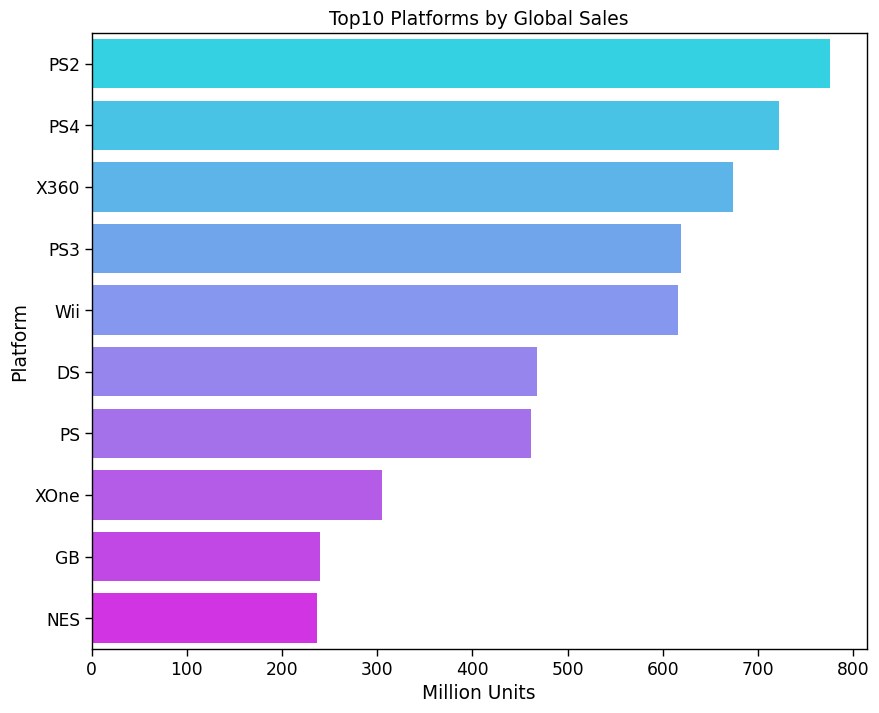

In [35]:
# plot global sales by platform


# set size & font 
plt.figure(figsize=(10, 8))
sns.set_context('paper', font_scale=1.4)

# create barplot from plat df, set x and y axes, set palette, title & axis labels
# remove error bars 

plat_plt = sns.barplot(data = plat, x = "Units Sold", y = "Platform", ci = None, palette = "cool") 
plat_plt.set(xlabel ="Million Units", ylabel = "Platform", title ='Top10 Platforms by Global Sales')


## Heatmap showing sales by year, broken down by platform

[Text(0.5, 52.91666666666664, 'Year'),
 Text(89.91666666666667, 0.5, 'Platform'),
 Text(0.5, 1.0, 'Yearly Sales Trend by Platform')]

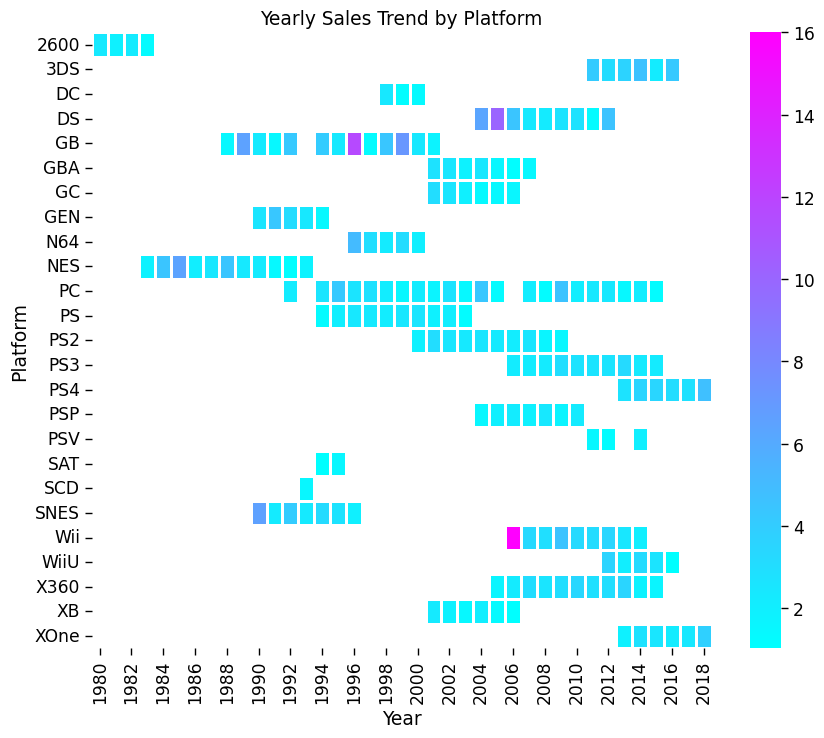

In [36]:
# set size & font 
plt.figure(figsize=(10, 8))
sns.set_context('paper', font_scale=1.4)

# create pivot table to form basis of heatmap, assign to variable
plat_year = df.pivot_table(index='Platform', columns='Year', values='Global')
# create heatmap based on pivot table created, separate data with lines to make easier to read
plat_year = sns.heatmap(plat_year, cmap='cool', linecolor='white', linewidth=1)
plat_year.set(xlabel ="Year", ylabel = "Platform", title ='Yearly Sales Trend by Platform')


## Sales by year - using a line chart to show sales trend

In [37]:
# create new df to group sales by year - as for previous
# again seems to be the only way I can get it to aggregate correctly but can't work out why - something weird in underlying data?? 
# have checked figures in Excel and these are correct but not sure why I can't plot it directly from the original df as aggregated
# figures are way off

yearsales = df.groupby('Year')['Global'].sum().to_frame(name = "Total Sales").reset_index()
yearsales

Year  Total Sales
0   1980         9.27
1   1981        20.29
2   1982        15.52
3   1983        12.27
4   1984        48.58
5   1985        51.60
6   1986        34.88
7   1987        17.18
8   1988        45.68
9   1989        71.92
10  1990        48.76
11  1991        22.57
12  1992        69.28
13  1993        35.54
14  1994        53.64
15  1995        49.04
16  1996       144.66
17  1997       140.04
18  1998       180.62
19  1999       166.88
20  2000       119.52
21  2001       230.87
22  2002       237.73
23  2003       198.97
24  2004       255.39
25  2005       266.19
26  2006       356.42
27  2007       383.08
28  2008       392.51
29  2009       373.15
30  2010       360.47
31  2011       306.30
32  2012       222.10
33  2013       299.42
34  2014       368.68
35  2015       336.35
36  2016       215.47
37  2017       125.45
38  2018        50.31

In [38]:

sns.set_palette("cool")

# set size & font 
plt.figure(figsize=(10, 8))
sns.set_context('paper', font_scale=1.4)

# create lineplot
yearplot = sns.lineplot(x = "Year", y = "Total Sales", data=yearsales)
yearplot.set(xlabel ="Year", ylabel = "Global Sales \n(million units)", title ='Yearly Sales Trend')

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Global Sales \n(million units)'),
 Text(0.5, 1.0, 'Yearly Sales Trend')]

## Most Popular Genres by Platform

In [39]:
# set size & font 
plt.figure(figsize=(10, 8))
sns.set_context('paper', font_scale=1.4)

# create pivot table to form basis of heatmap, assign to variable
plat_genre = df.pivot_table(index='Platform', columns='Genre', values='Global')
# create heatmap from pivot table, separate data with lines to make easier to read
plat_genre = sns.heatmap(plat_genre, cmap='cool', linecolor='white', linewidth=1)
plat_genre.set(xlabel ="Genre", ylabel = "Platform", title ='Most Popular Genres by Platform')

[Text(0.5, 52.91666666666664, 'Genre'),
 Text(89.91666666666667, 0.5, 'Platform'),
 Text(0.5, 1.0, 'Most Popular Genres by Platform')]

# I FORGOT TO CHECK FOR DUPLICATES!

# Let's check for any duplicate rows and keep only the first one, dropping any subsequent rows. 

As it happens, there aren't any...but let's run it based on the game title alone (these will be duplicated as the same game will be released across multiple platforms). The row count reduces from 2272 to 1682.

In [40]:
# use drop_duplicates function, by default it will look across all cols but use subset to limit this to "game"; keep first 
# instance and drop any subsequent 
# inplace = false to create a new result and ignor_index = false to reset the index 

drop_dupes = df.drop_duplicates(subset = "Game", keep = "first", inplace = False, ignore_index = True)
drop_dupes

Game Platform  Year     Genre  \
0     Pitfall II: Lost Caverns     2600  1983  Platform   
1                      Dig Dug     2600  1982    Puzzle   
2                        Joust     2600  1982  Platform   
3                  Jungle Hunt     2600  1982  Platform   
4                  Mario Bros.     2600  1982  Platform   
...                        ...      ...   ...       ...   
1677          Sunset Overdrive     XOne  2014   Shooter   
1678             Dead Rising 3     XOne  2013    Action   
1679        Forza Motorsport 5     XOne  2013    Racing   
1680                      Ryse     XOne  2013    Action   
1681         Ryse: Son of Rome     XOne  2013    Action   

                   Publisher  North America  Europe  Japan  Rest of World  \
0                 Activision           1.22    0.07   0.00           0.02   
1                      Atari           1.52    0.10   0.00           0.02   
2                      Atari           1.01    0.06   0.00           0.01   
3                      Atari           1.03    0.06   0.00           0.01   
4                      Atari           1.48    0.09   0.00           0.02   
...                      ...            ...     ...    ...            ...   
1677  Microsoft Game Studios           0.63    0.40   0.00           0.10   
1678  Microsoft Game Studios           1.06    0.35   0.01           0.15   
1679  Microsoft Game Studios           1.21    0.79   0.01           0.19   
1680       Microsoft Studios           0.84    0.49   0.00           0.13   
1681  Microsoft Game Studios           0.83    0.43   0.00           0.13   

      Global  
0       1.31  
1       1.64  
2       1.08  
3       1.10  
4       1.59  
...      ...  
1677    1.14  
1678    1.57  
1679    2.20  
1680    1.47  
1681    1.38  

[1682 rows x 10 columns]

# THANK YOU FOR READING! 